# **House Price Prediction**

# Project Details

#Aim: Build a simple linear regression model to predict house prices based on features like:  the number of bedrooms , square footage.

## Description: Use a dataset of house prices, split it into training and testing sets, and build a
#                         regression model using Scikit-learn.
# Technologies: Python, Pandas, Scikit-learn, Matplotlib

**Steps Envolve for  Making Machine Learning Model**

1  -  Import Required Library

2 -  Read Dataset

3 - Data cleaning

4  -  Exploratory Data Analysis


In [106]:
#1 - Import Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [107]:
#creating a dataset
np.random.seed(42)
n_samples = 200
square_footage = np.random.randint(800, 5000, n_samples)  # Random square footage between 800 and 5000
bedrooms = np.random.randint(1, 6, n_samples)  # Random bedrooms between 1 and 5
price = square_footage * 150 + bedrooms * 10000 + np.random.randint(-20000, 20000, n_samples)

In [108]:
#Creating DataFrame
df =pd.DataFrame(
    {'square_footage': square_footage,"Bedrooms":bedrooms,"Price":price}
)

In [109]:
df.head()

,square_footage,Bedrooms,Price
0,1660,4,289764
1,4572,3,716291
2,3892,1,612294
3,1266,3,203273
4,4244,1,638761


In [135]:
df.to_csv("Dataset")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   square_footage  200 non-null    int64
 1   Bedrooms        200 non-null    int64
 2   Price           200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [73]:
df.describe()

,square_footage,Bedrooms,Price
count,200.000000,200.000000,200.000000
mean,2957.395000,3.025000,474959.015000
std,1153.690926,1.440399,174302.225383
min,834.000000,1.000000,115828.000000
25%,2046.250000,2.000000,334493.750000
50%,2858.500000,3.000000,476633.500000
75%,3953.250000,4.000000,632761.750000
max,4991.000000,5.000000,793048.000000


In [74]:
df.isnull().sum()

,0
square_footage,0
Bedrooms,0
Price,0


In [110]:
#define Dewpendent & Independent Feature
x= df.iloc[:,:-1]# Dependent Features
y = df.iloc[:,-1] # Independent Features or Target Features

In [111]:
# split Dataset in Train and test Data
from sklearn.model_selection import train_test_split

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [125]:
# for Standerdize the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [126]:
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-1.8208111 , -1.42311571],
       [ 0.59149132, -1.42311571],
       [ 1.17444951, -1.42311571],
       [ 1.19769631, -0.74544156],
       [-0.2185702 , -0.74544156],
       [-0.23377003, -0.06776741],
       [-1.66613048, -0.74544156],
       [ 0.87313523, -0.74544156],
       [-1.56867275, -1.42311571],
       [-1.31206385, -0.06776741],
       [-1.21997077, -0.74544156],
       [-1.77074107,  0.60990673],
       [-1.41578034, -0.74544156],
       [-1.65540119, -0.06776741],
       [-0.17297071,  0.60990673],
       [ 0.12744946,  0.60990673],
       [ 1.4310584 ,  1.28758088],
       [ 0.90532311,  0.60990673],
       [-1.82617575,  0.60990673],
       [ 1.56517455, -0.74544156],
       [-0.85875128,  0.60990673],
       [-1.58119025,  1.28758088],
       [ 0.47793965, -0.06776741],
       [-1.55615524, -0.74544156],
       [-1.703683  , -0.74544156],
       [-1.11536017, -0.74544156],
       [ 0.18914288, -1.42311571],
       [-1.04293745, -0.06776741],
       [-1.37107496,

In [127]:
# Choose Linear model as Linear regression as given Instruction
from sklearn.linear_model import LinearRegression
model =LinearRegression()

In [128]:
#Fit the model
model.fit(x_train,y_train)

LinearRegression()

In [129]:
# perform Prediction on test Data
y_pred= model.predict(x_test)


In [130]:
# Checking Accuracy
from sklearn.metrics import r2_score,mean_squared_error

In [131]:
score=r2_score(y_pred,y_test)
score*100

99.54798729921824

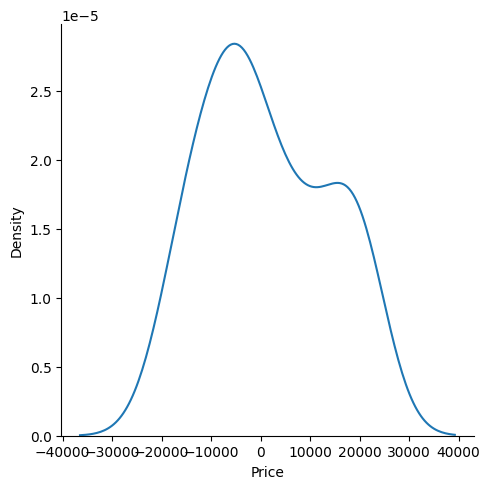

In [132]:
#  show the data distribution which are good
sns.displot(y_pred-y_test,kind='kde')

In [97]:
import pickle

In [102]:
with open('/content/HousePricePredict.pkl','wb') as f:
  pickle.dump(model,f)
  print("sucess")

sucess


In [103]:
#check the model are working are not
with open('/content/HousePricePredict.pkl','rb') as f:
    mp = pickle.load(f)

In [104]:
print(mp.predict([[1660,4]]))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([289862.35409278])

In [133]:
# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error: 151392236.53926238
R-squared Score: 0.9955436283906022
Model Coefficients: [  150.47658068 10157.99976207]
Model Intercept: -560.7688884013332


In [134]:
# Summary Report
def generate_report():
    report = f"""
    Project: House Price Prediction using Linear Regression
    -------------------------------------------------------
    - Technologies Used: Python, Pandas, Scikit-learn, Matplotlib
    - Model Used: Linear Regression
    - Mean Squared Error: {mse:.2f}
    - R-squared Score: {r2:.2f}
    - Model Coefficients: {model.coef_}
    - Model Intercept: {model.intercept_}
    """
    return report

report = generate_report()
print(report)

# Save report to a file
with open("house_price_prediction_report11.txt", "w") as file:
    file.write(report)


    Project: House Price Prediction using Linear Regression
    -------------------------------------------------------
    - Technologies Used: Python, Pandas, Scikit-learn, Matplotlib
    - Model Used: Linear Regression
    - Mean Squared Error: 151392236.54
    - R-squared Score: 1.00
    - Model Coefficients: [  150.47658068 10157.99976207]
    - Model Intercept: -560.7688884013332
    
